# Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [16]:
def readfile(file):
    data = []
    with open(file) as f:
        for line in f:
            temp = ast.literal_eval(line.strip())
            data.append(temp)
    return data

## Define functions

In [17]:
def calculateAvg(data):
    AvgGenerate = 0
    AvgDepth = 0
    AvgExpand = 0
    AvgBranchingFactor = 0
    AvgTime = 0 

    for i in data:
        AvgGenerate += i['Generated']
        AvgDepth += i['Depth']
        AvgExpand += i['Expanded']
        AvgBranchingFactor += i['AvgBranchingFactor']
        AvgTime += i['Time']

    return AvgGenerate /10, AvgDepth /10, AvgExpand /10,  AvgBranchingFactor /10, AvgTime/10


def calculateValues(data):
    generate = []
    depth = []
    expand = []
    branchingFactor = []
    time = []

    for i in data:
        generate.append(i['Generated'])
        depth.append(i['Depth'])
        expand.append(i['Expanded'])
        branchingFactor.append(i['AvgBranchingFactor'])
        time.append(i['Time']) 

    return generate, depth, expand,  branchingFactor, time

# A star

## Read Data

In [18]:
dataMan = readfile('../../manhattan-data.txt')
dataWeightedMan = readfile('../../weighted-manhattan.txt')

AvgGenerateManhattan , AvgDepthManhattan, AvgExpandManhattan,AvgBranchingFactorManhattan = calculateAvg(dataMan)
AvgGenerateWeightedManhattan , AvgDepthWeightedManhattan, AvgExpandWeightedManhattan,AvgBranchingFactorWeightedManhattan = calculateAvg(dataWeightedMan)

KeyError: 'Time'

In [ ]:
generateMan, depthMan, expandMan, branchingFactorMan = calculateValues(dataMan)
generateWeightedMan, depthWeightedMan, expandWeightedMan, branchingFactorWeightedMan = calculateValues(dataWeightedMan)

## Manhattan

NameError: name 'generateMan' is not defined

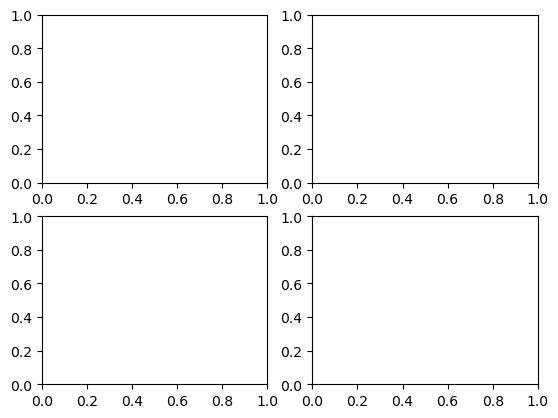

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, generateMan)
axs[0, 0].set_title('Generated')
axs[0, 1].plot(x, expandMan, 'tab:orange')
axs[0, 1].set_title('Expanded')
axs[1, 0].plot(x, depthMan, 'tab:green')
axs[1, 0].set_title('Depth')
axs[1, 1].plot(x, branchingFactorMan, 'tab:red')
axs[1, 1].set_title('AVG Branching Factor')

for ax in axs.flat:
    ax.set(xlabel='#Run', ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('Manhattan.png',dpi=300, bbox_inches = "tight")

## Weighted Manhattan

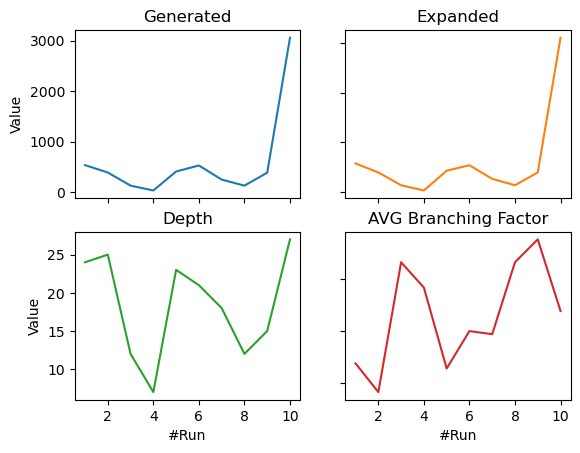

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, generateWeightedMan)
axs[0, 0].set_title('Generated')
axs[0, 1].plot(x, expandWeightedMan, 'tab:orange')
axs[0, 1].set_title('Expanded')
axs[1, 0].plot(x, depthWeightedMan, 'tab:green')
axs[1, 0].set_title('Depth')
axs[1, 1].plot(x, branchingFactorWeightedMan, 'tab:red')
axs[1, 1].set_title('AVG Branching Factor')

for ax in axs.flat:
    ax.set(xlabel='#Run', ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('WeightedManhattan.png',dpi=300, bbox_inches = "tight")

## Average Comparitive Plot

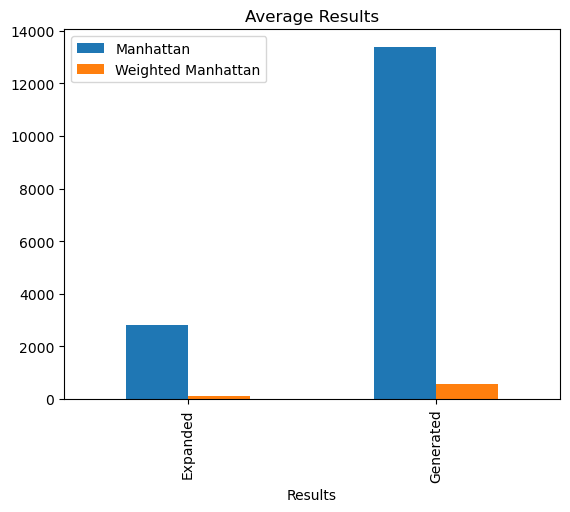

In [ ]:
df = pd.DataFrame([['Expanded', AvgExpandManhattan,AvgExpandWeightedManhattan], ['Generated', AvgGenerateManhattan, AvgGenerateWeightedManhattan]],
                  columns=['Results', 'Manhattan', 'Weighted Manhattan'])
# view data
ax = df.plot(x='Results',
             kind='bar',
             stacked=False,
             title='Average Results')
plt.savefig('AvgResult1.png',dpi=300, bbox_inches = "tight")
plt.show()

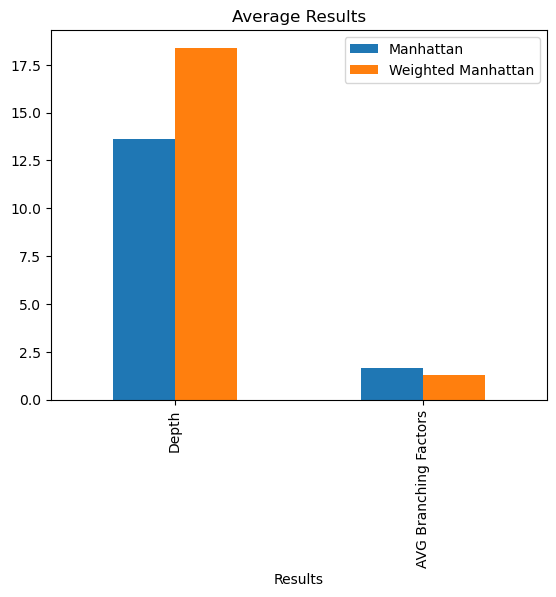

In [ ]:
# create data
df = pd.DataFrame([['Depth', AvgDepthManhattan, AvgDepthWeightedManhattan], ['AVG Branching Factors', AvgBranchingFactorManhattan, AvgBranchingFactorWeightedManhattan]],
                  columns=['Results', 'Manhattan', 'Weighted Manhattan'])
# view data
ax = df.plot(x='Results',
             kind='bar',
             stacked=False,
             title='Average Results')

# plt.tight_layout()
# plt.savefig('testfig.png',dpi=300, bbox_inches = "tight")
plt.savefig('AvgResult2.png',dpi=300, bbox_inches = "tight")
plt.show()


# Part 3

In [ ]:
dataPart3 = readfile('../../part3-data.txt')
AvgGeneratePart3 , AvgDepthPart3, AvgExpandPart3,AvgBranchingFactorPart3, AvgtimePart3 = calculateAvg(dataPart3)
generatePart3 , depthPart3, expandPart3,branchingFactorPart3, timePart3 = calculateValues(dataPart3)

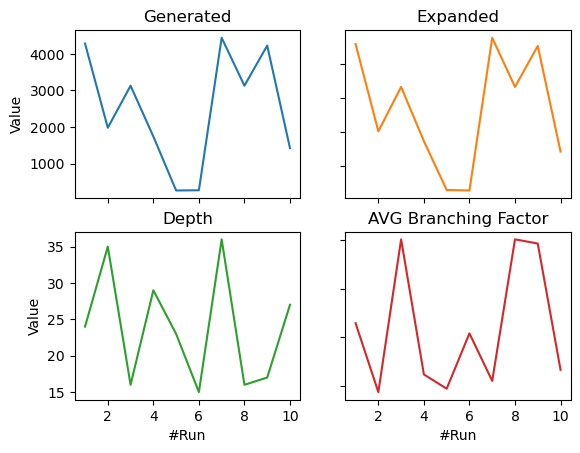

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, generatePart3)
axs[0, 0].set_title('Generated')
axs[0, 1].plot(x, expandPart3, 'tab:orange')
axs[0, 1].set_title('Expanded')
axs[1, 0].plot(x, depthPart3, 'tab:green')
axs[1, 0].set_title('Depth')
axs[1, 1].plot(x, branchingFactorPart3, 'tab:red')
axs[1, 1].set_title('AVG Branching Factor')

for ax in axs.flat:
    ax.set(xlabel='#Run', ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('part3.png',dpi=300, bbox_inches = "tight")